In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load and Inspect Data

In [47]:
# Load the dataset
df = pd.read_csv("./data/training_v2.csv")

# Shape
print("Shape of dataset:", df.shape)

Shape of dataset: (91713, 186)


In [48]:
# First few rows
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [49]:
# Average statistics

In [50]:
# Unique patients 

# Missing Values

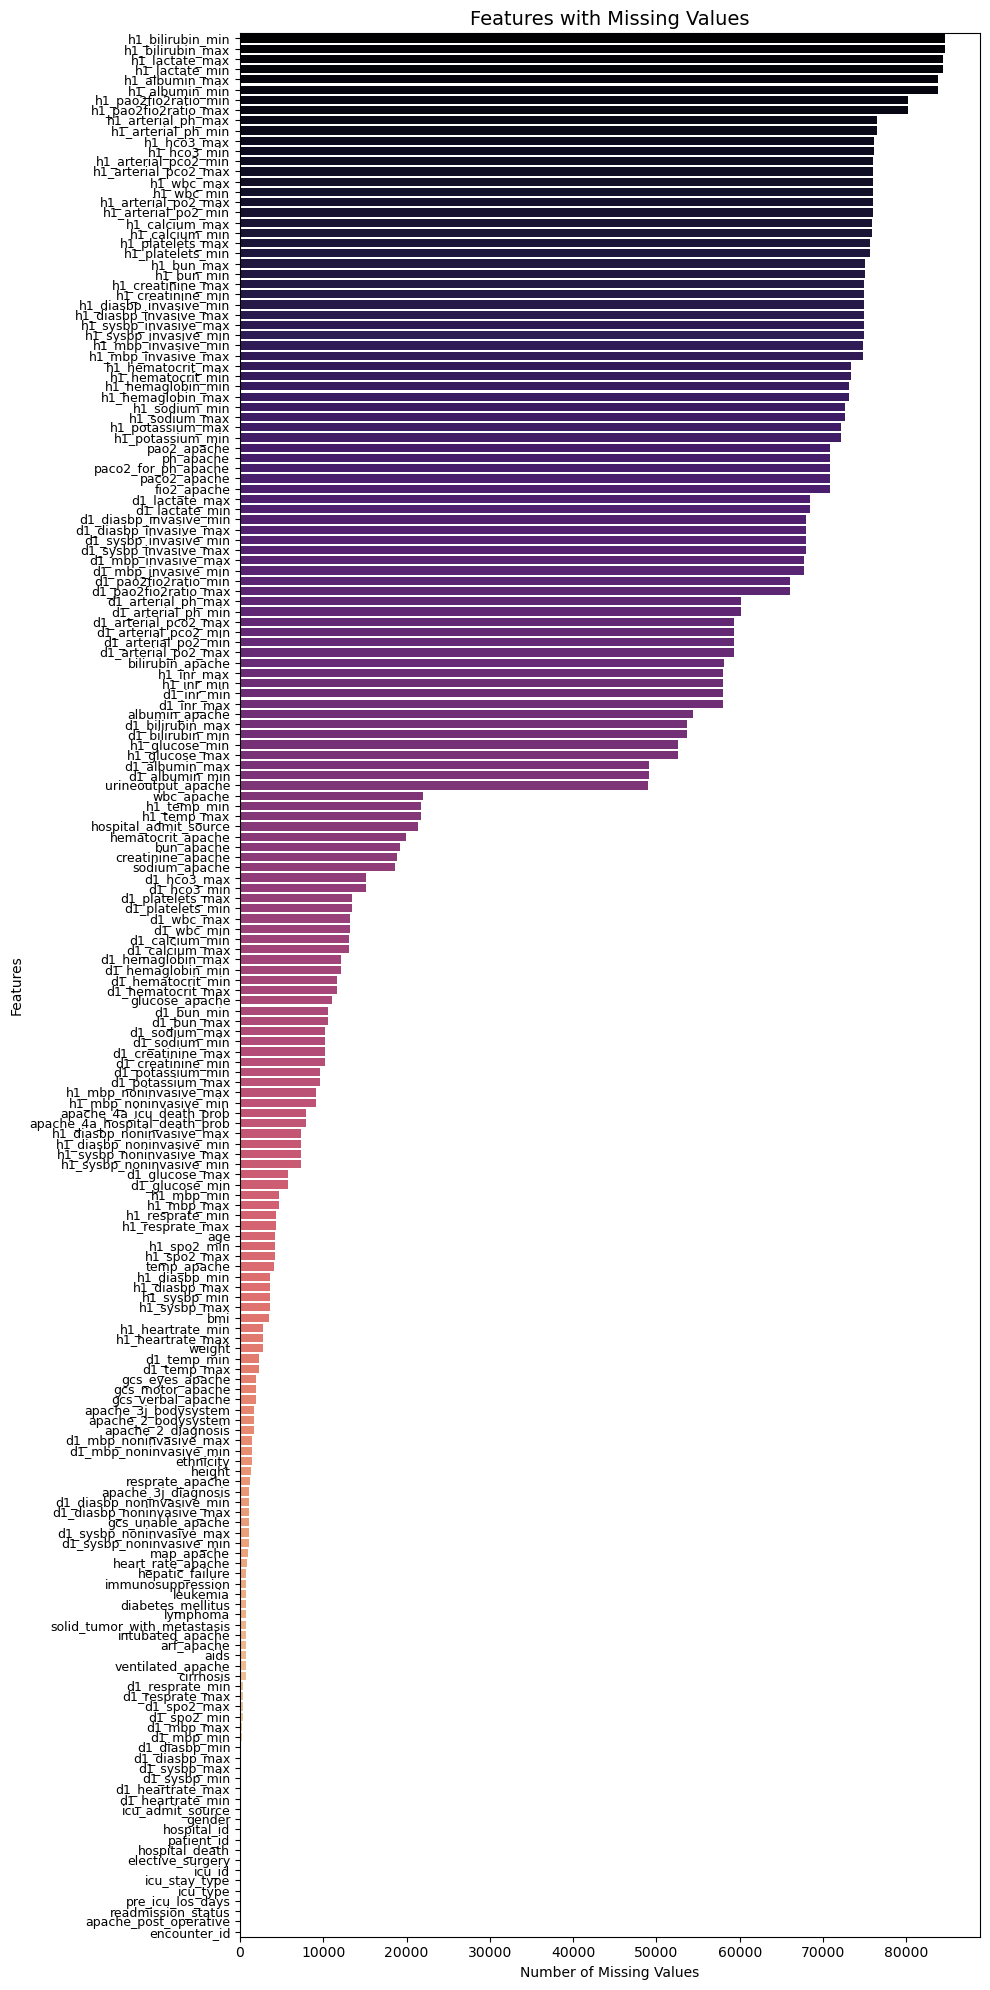

In [54]:
# Get missing value counts 
missing_counts = df.isnull().sum()
missing_counts = missing_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 20))
sns.barplot(
    x=missing_counts.values,
    y=missing_counts.index,
    hue=missing_counts.index,
    dodge=False,
    palette="magma",
    legend=False
)
plt.title("Features with Missing Values", fontsize=14)
plt.xlabel("Number of Missing Values")
plt.ylabel("Features")
plt.tick_params(axis='y', labelsize=9)
plt.tight_layout()
plt.show()



In [55]:
missing_pct = df['hospital_death'].isnull().mean() * 100
print(f"Missing percentage for 'hospital_death': {missing_pct:.2f}%")

Missing percentage for 'hospital_death': 0.00%


In [56]:
# Remove the features with more than 50% missing values 

missing_percent = df.isnull().mean() * 100
df_filtered = df.loc[:, missing_percent <= 50]

print("Shape before:", df.shape)
print("Shape after dropping columns with >50% missing:", df_filtered.shape)

df = df_filtered


Shape before: (91713, 186)
Shape after dropping columns with >50% missing: (91713, 112)


In [43]:
# 0. Look at patient id unique counts and admission id unique count
# 1. Decide the most relevant predictors
# 2. Compute missing values if any remaining 
# 3. Deal with class imbalance
# 4. Standardize data
# 5. Encode categorical variables
# 6. Pass our proposal to ChatGPT and figure out the rest 
# 7. Fit baseline models (before DP)

# Important Predictors

In [58]:
# From the predictors that we keep, figure out which ones are numerical and categorical

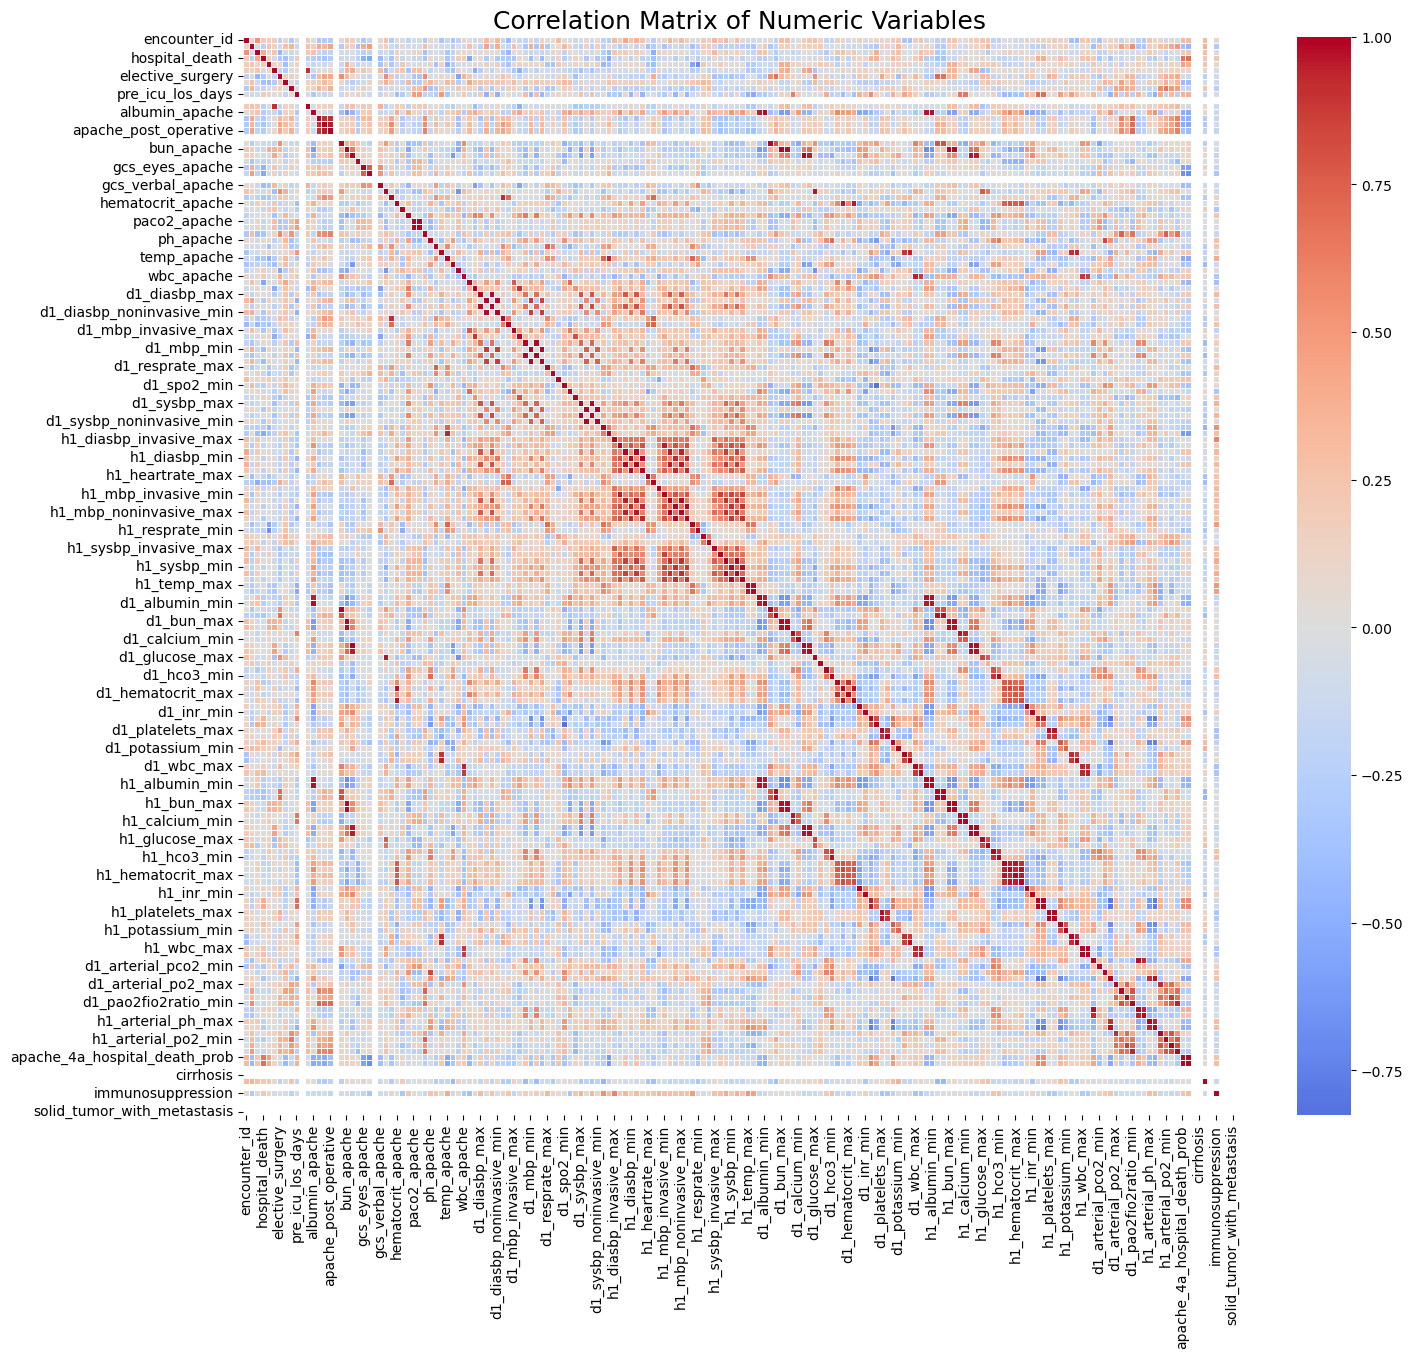

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing values just for the correlation plot (you can impute later)
corr_df = numeric_df.dropna()

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=18)
plt.show()


# Impute Remaining Missing Values

# Class Imbalance

In [ ]:
### Visualize 
class_counts = df['hospital_death'].value_counts()
print("Mortality counts:")
print(class_counts)

# Visualize it
sns.countplot(data=df, x='hospital_death')
plt.title("Class Distribution: 30-Day Mortality")
plt.xlabel("Mortality (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
